# Email Spam Classification

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

%matplotlib inline
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [2]:
data = pd.read_csv("emails.csv")
data = data.sample(frac = 1)
data.head()

,text,spam
4620,Subject: enronoptions - your stock option prog...,0
1511,"Subject: resume of phil roan , koch weather de...",0
2659,"Subject: var for cob lst aug 2000 hi , i hav...",0
5271,Subject: re : charm you are welcome to have s...,0
951,Subject: more then 70 great pornstars sex movl...,1


In [3]:
data.shape

(5728, 2)

In [4]:
data["text"][0]

"Subject: naturally irresistible your corporate identity  lt is really hard to recollect a company : the  market is full of suqgestions and the information isoverwhelminq ; but a good  catchy logo , stylish statlonery and outstanding website  will make the task much easier .  we do not promise that havinq ordered a iogo your  company will automaticaily become a world ieader : it isguite ciear that  without good products , effective business organization and practicable aim it  will be hotat nowadays market ; but we do promise that your marketing efforts  will become much more effective . here is the list of clear  benefits : creativeness : hand - made , original logos , specially done  to reflect your distinctive company image . convenience : logo and stationery  are provided in all formats ; easy - to - use content management system letsyou  change your website content and even its structure . promptness : you  will see logo drafts within three business days . affordability : your  ma

0    4360
1    1368
Name: spam, dtype: int64


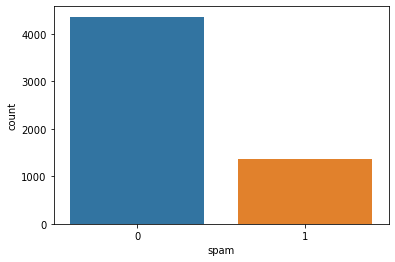

In [5]:
print(data["spam"].value_counts())
sns.countplot(data["spam"])

In [6]:
## In this dataset all email have some punctuation so we have to remove it and data is imbalance so we have to balance it

## Feature Extraction

In [7]:
stopword = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

In [8]:
import string
import nltk

stopword.append("Subject")

def remove_punctutaion(text):
    remove_punctutaion = [char for char in text if char not in string.punctuation]
    remove_punctutaion = ''.join(remove_punctutaion)
    return remove_punctutaion

In [9]:
X = data["text"].apply(remove_punctutaion)
Y = data["spam"]

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
vector = CountVectorizer()
vector.fit(X)

CountVectorizer()

In [11]:
X_tf= vector.transform(X)

In [13]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X = tfidf_transformer.fit_transform(X_tf).toarray()

In [ ]:
X = X.toarray()

In [14]:
X.shape

(5728, 37330)

In [15]:
Y.shape

(5728,)

In [16]:
# Balancing the data set
from imblearn.combine import SMOTETomek
# Implementing Oversampling for Handling Imbalanced 
smk = SMOTETomek(random_state=42)
X_bal,y_bal=smk.fit_resample(X,Y)

In [17]:
X_bal.shape,y_bal.shape

((8720, 37330), (8720,))

In [18]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(y_bal)))

Original dataset shape Counter({0: 4360, 1: 1368})
Resampled dataset shape Counter({0: 4360, 1: 4360})


In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_bal,y_bal,test_size=0.3,random_state=20)

In [20]:
## Train the model
from sklearn.naive_bayes import MultinomialNB
model1 = MultinomialNB()
model1.fit(x_train,y_train);

In [30]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
y_pred = model1.predict(x_test)
print("==============================================")
print("Training set error")
print(accuracy_score(model1.predict(x_train),y_train))
print("==============================================")
print("Testing set error")
print(accuracy_score(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))

Training set error
0.9977064220183486
Testing set error
0.9915902140672783
[[1287    9]
 [  13 1307]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1296
           1       0.99      0.99      0.99      1320

    accuracy                           0.99      2616
   macro avg       0.99      0.99      0.99      2616
weighted avg       0.99      0.99      0.99      2616



In [32]:
# Model with Imbalance dataset
from sklearn.model_selection import train_test_split
x_train_unbal,x_test_unbal,y_train_unbal,y_test_unbal = train_test_split(X,Y,test_size=0.3,random_state=20)

In [33]:
## Train the model
from sklearn.naive_bayes import MultinomialNB
model2 = MultinomialNB()
model2.fit(x_train_unbal,y_train_unbal);

In [39]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
y_pred_unbal = model2.predict(x_test_unbal)
print("==============================================")
print("Training set error")
print(accuracy_score(model1.predict(x_train_unbal),y_train_unbal))
print("==============================================")
print("Testing set error")
print(accuracy_score(y_pred_unbal,y_test_unbal))
print(confusion_matrix(y_pred_unbal,y_test_unbal))
print(classification_report(y_pred_unbal,y_test_unbal))

Training set error
0.9937640309304066
Testing set error
0.8627108784176847
[[1318  235]
 [   1  165]]
              precision    recall  f1-score   support

           0       1.00      0.85      0.92      1553
           1       0.41      0.99      0.58       166

    accuracy                           0.86      1719
   macro avg       0.71      0.92      0.75      1719
weighted avg       0.94      0.86      0.89      1719



In [ ]:
## Model with logistic regression

In [25]:
from sklearn.linear_model import LogisticRegression
model3 = LogisticRegression()
model3.fit(x_train,y_train)

LogisticRegression()

In [38]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
y_pred = model3.predict(x_test)
print("==============================================")
print("Training set error")
print(accuracy_score(model1.predict(x_train),y_train))
print("==============================================")
print("Testing set error")
print(accuracy_score(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))

Training set error
0.9977064220183486
Testing set error
0.9935015290519877
[[1287    4]
 [  13 1312]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1291
           1       1.00      0.99      0.99      1325

    accuracy                           0.99      2616
   macro avg       0.99      0.99      0.99      2616
weighted avg       0.99      0.99      0.99      2616



In [ ]:
### chacking for the new email